# IBM Attrition analysis

### Table of contents:
[1. Problem statement](#ps)<br/>   
  - 1.1 Objective
  - 1.2 Attributes  
  
[2. Importing data](#id)  

[3. Descriptive stats, Data Analysis & Graphs](#ds)
 
  - 3.1 Distribution of dataset
  - 3.2 Correlation of features
    
[4. Feature Engineering](#fe)    
 
  - 4.1 Categorical encoding
  - 4.2 Data Partition
  - 4.3 Smoting

[5. Algorithm Selection](#as)

  - 5.1 Random Forest
  - 5.2 Decision Tree
  - 5.3 Gradient Boosting
  - 5.4 XGBoost
  - 5.5 ADA Boosting

[6. Conclusions and Recommendations](#oc)

### 1. Problem statement <a name='ps'></a>
Uncover the factors that lead to employee attrition and explore important questions. This is a fictional data set created by IBM data scientists.

**1.1 Objective:** Factors influencing attrition

**1.2 Attributes:** Overall 35 features are there. Below are the categorical features with description

*Education:*                - 1: Below College 2: College 3: Bachelor 4: Master 5: Doctor <br/>
*EnvironmentSatisfaction:*  - 1: Low 2: Medium 3: High 4: Very High <br/>
*JobInvolvement:*           - 1: Low 2: Medium 3: High 4: Very High<br/>
*JobSatisfaction:*          - 1: Low 2: Medium 3: High 4: Very High<br/>
*PerformanceRating:*        - 1: Low 2: Good 3: Excellent 4: Outstanding<br/>
*RelationshipSatisfaction:* - 1: Low 2: Medium 3: High 4: Very High<br/>
*WorkLifeBalance:*          - 1: Bad 2: Good 3: Better 4: Best<br/>

### Importing data and packages <a name='id'></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
attrition = pd.read_csv("IBMAttrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Note:**<br/>
As evinced from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.    

In [3]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

**Observations:**<br/>
No of Rows: 1470<br/>
No of Columns: 35<br/>
There are no missing values.<br/>

### 3. Descriptive Stats, Data analysis & Graphs <a name='ds'></a>

In [4]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Note:**
Furthermore, we see that we have a mix of numerical and categorical data types.    

In [5]:
# Looking for NaN
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

**Note:**<br/>
As we already see that there are no missing values.

#### 3.1 Distribution of the dataset

Generally one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, I shall invoke the familiar kdeplot function from the Seaborn plotting library and this generates bivariate plots as follows:

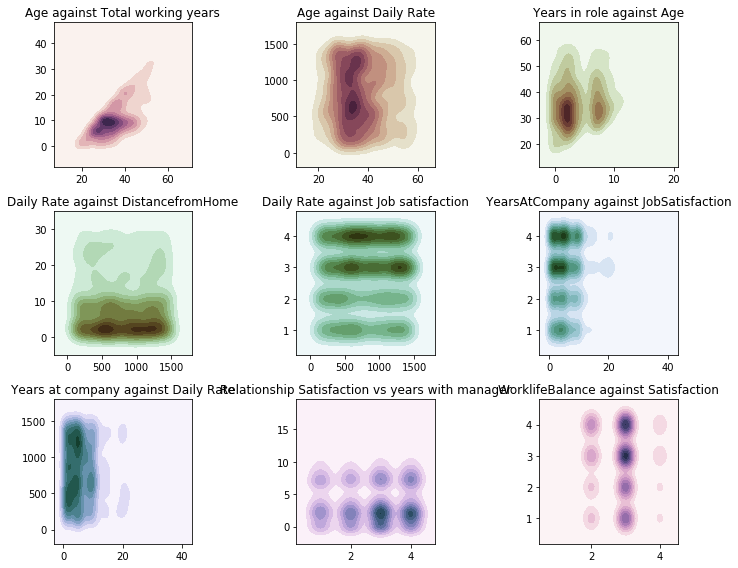

In [6]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'YearsAtCompany against JobSatisfaction')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

**Observations:**<br/>
1. Majority Employee age group is between 25-40 <br/>
2. Majority employees Years at company is less than 10    <br/>
3. Total work experience of majority employees is less than 10 which at job satisfaction level 3 & 4. <br/>

In [7]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

In [8]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager']


** 3.2 Correlation of Features**<br/>
The next tool in a data explorer's arsenal is that of a correlation matrix. By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

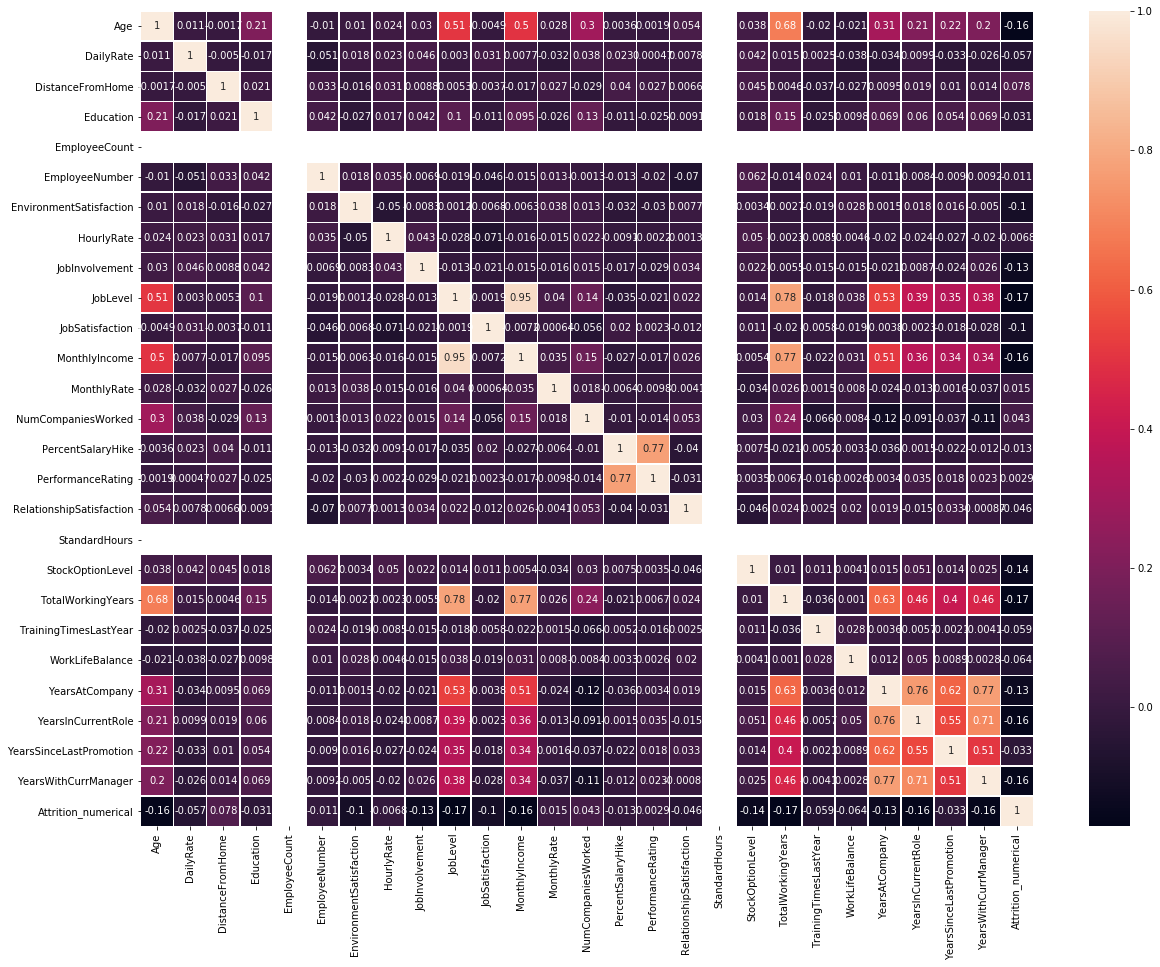

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(attrition.corr(), annot=True, linewidths=.5,)
plt.show()

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features.

**JobRole vs Attrition**

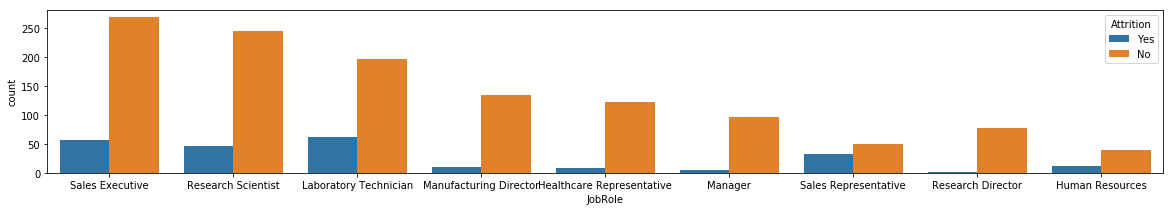

In [10]:
plt.figure(figsize=(20,3))
sns.countplot(x='JobRole',data=attrition, hue='Attrition')

**Observations:**
1. Employees in the field of Sales are more likely to quit and more so with the representatives.
2. Rate of Attrition is more the with 'Lab Technician'

**Gender vs Attrition**

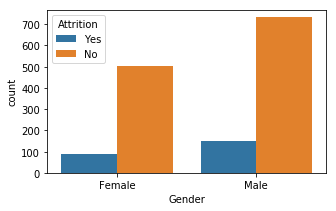

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=attrition, hue='Attrition')

**Observations:**<br/>
There seems to be NO difference between genders for attrition. But still Males are more likely to quit than females.    

### 4. Feature Engineering <a name='fe'></a>
Let us now proceed onto the task of Feature engineering and numerically encoding the categorical values in our dataset. <br/>
To start off, we shall segregate numerical columns from categorical columns via the use of the dtype method as follows:


In [12]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

Having identified which of our features contain categorical data, we can set about numerically encoding the data. We can do this by using get_dummies method from Pandas which creates encoded dummy variables from the categorical variables.

**4.1 Categorical encoding**

In [13]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [14]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [15]:
# Store the numerical features to a dataframe attrition_num
attrition_num = attrition[numerical]

Having encoded our categorical columns as well as engineering and created some new features from the numerical data, we can now proceed to merging both dataframes into a final set with which we will train and test our models on.

In [16]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

**Target variable**

One final step that that we have to remember is to generate our target variable. The target in this case is given by the column Attrition which contains categorical variables therefore requires numerical encoding. We numerically encode it by creating a dictionary with the mapping given as 1 : Yes and 0 : No

In [17]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

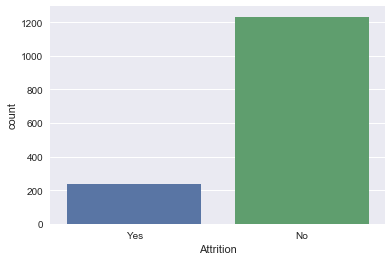

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Attrition", data=attrition)

**Observations:**<br/>
However just by a quick inspection of the counts of the number of 'Yes' and 'No' in the target variable tells us that there is quite a large skew in target as shown.<br/>
Therefore we have to keep in mind that there is quite a big imbalance in our target variable. In order to handle imbalances in data (oversampling or undersampling) we can use an oversampling technique known as **SMOTE**.

** 4.2 Data Partition**<br/>
Having performed some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

In [19]:
# Import the train_test_split method
from sklearn.cross_validation import train_test_split

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, target, train_size= 0.75,random_state=0);

** 4.3 SMOTE to oversample due to the skewness in target**<br/>
Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [20]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

### 5. Algorithm Selection <a name='as'></a>

### 5.1 Random Forest Classifier

**Initialising Random Forest parameters**<br/>
We will utilise the Scikit-learn library to construct a Random Forest model. To do so, we have to first define our set of parameters that we will feed into our Random Forest classifier as follows

In [21]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

Having defined our parameters, we can initialise a Random Forest object by using scikit-learn's RandomForestClassifier and unpacking the parameters by adding the double asterisks symbols as follows

In [23]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
accuracy_score(target_val, rf_predictions)

0.87771739130434778

**Observations:**<br/>
As observed, our Random Forest returns an accuracy of 88% for its predictions. This seems to be a very good performing model. 

In [24]:
#confusion matrix
from sklearn import metrics  
confusion_matrix_rf=metrics.confusion_matrix(target_val,rf_predictions)
confusion_matrix_rf

array([[306,   4],
       [ 41,  17]], dtype=int64)

**Feature Ranking via the Random Forest**<br/>
The Random Forest classifier in Sklearn also contains a very convenient and most useful attribute featureimportances which tells us which features within our dataset has been given most importance through the Random Forest algorithm. Shown below is an Interactive Plotly diagram of the various feature importances.

In [25]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
         #showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

**Most RF important features: Overtime, Marital Status**<br/>
As observed in the plot of feature importances, it seems that our Random Forest Classifier has decided to rank the features of OverTime highest, which is followed by marital status.

### 5.2 Decision Tree Classifier<br/>
Let us now visualise how a decision tree traverses the features in our data.

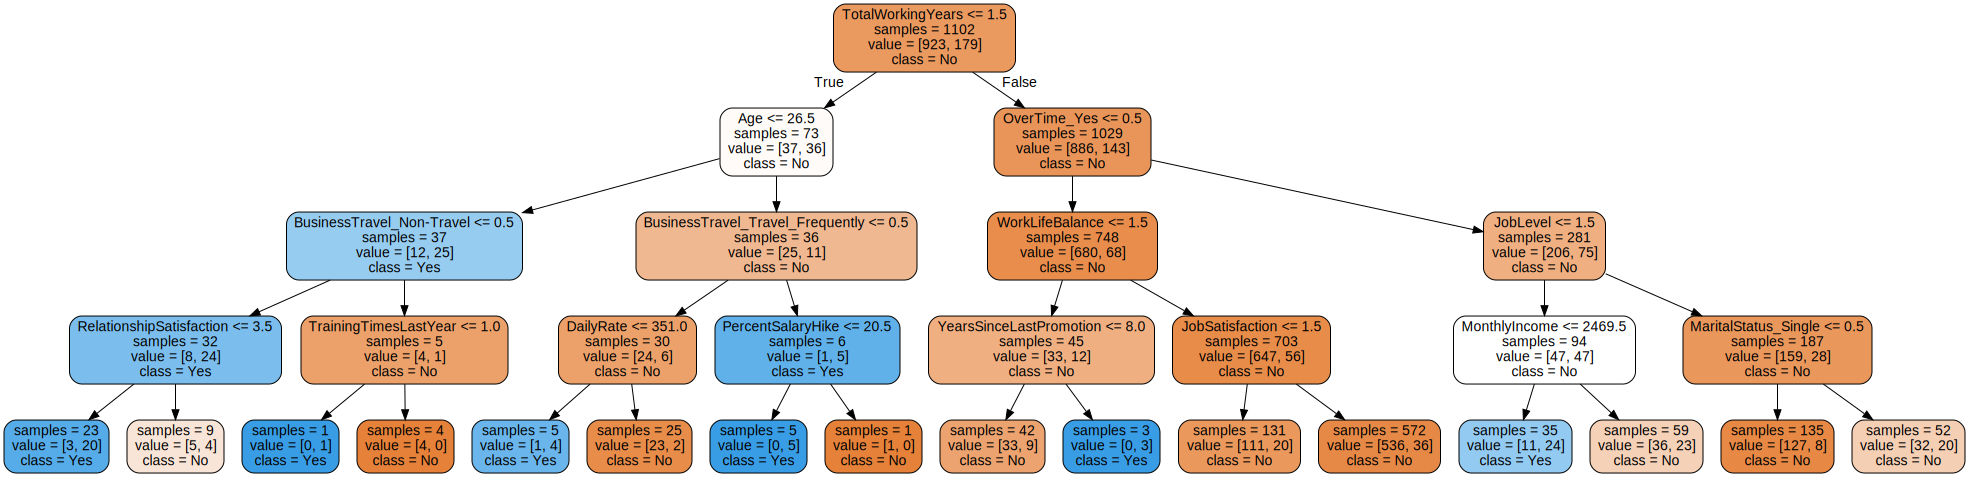

In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dt = DecisionTreeClassifier(max_depth = 4)
dt = dt.fit(train, target_train)
dot_data = export_graphviz(dt, out_file= None,
                              max_depth = 4,
                              impurity = False,
                              feature_names = attrition_final.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True 
                          )  
graph = graphviz.Source(dot_data)  
graph 

In [27]:
dt_predictions = dt.predict(test)
accuracy_score(target_val, dt_predictions)

0.84782608695652173

In [28]:
confusion_matrix_dt=metrics.confusion_matrix(target_val,dt_predictions)
confusion_matrix_dt

array([[301,   9],
       [ 47,  11]], dtype=int64)

### 5.3 Gradient Boosted Classifier

Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak Tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

**Initialising Gradient Boosting Parameters**<br/>

In general there are a handful of key parameter when setting up tree-based or gradient boosted models. These are always going to be the number of estimators, the maximum depth with which you want your model to be trained to, and the minimum samples per leaf

**GridSearch for best parameters**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,make_scorer
sss=StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=42)

search_params={'n_estimators':[200,300,700, 900, 1000],'max_features':['log2','sqrt'],
               'max_depth': [3, 5, 15,20,40],'learning_rate': [0.0001,0.001, 0.01,0.10,0.20,0.30],
               'min_samples_leaf': [2,4,6,10,20]
              }
grid = GridSearchCV(estimator=gb, param_grid=search_params,cv=sss,refit=True,

                   )
grid.fit(smote_train,smote_target)
print(grid.best_params_ )
#print(grid.best_score_)

In [31]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 700,
    'max_features': 0.9,
    'learning_rate' : 0.1,
    'max_depth': 5,
    'min_samples_leaf': 4,
    'subsample': 1,
    'max_features' : 'log2',
    'random_state' : seed,
    'verbose': 0
}

In [32]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
accuracy_score(target_val, gb_predictions)

0.87771739130434778

**Feature Ranking via the Gradient Boosting Model**<br/>
Much like the Random Forest, we can invoke the featureimportances attribute of the gradient boosting model and dump it in an interactive Plotly chart

In [60]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

**Observations:**<br/>
The top factors that influence the attrition seem to be:<br/>
Overtime<br/>
Monthly income<br/>
Age<br/>
Distance from Home<br/>
Total working Years<br/>
Job Satisfaction<br/>
Environment Satisfaction<br/>

**Randomized Search for Gradient Boosting Parameters**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"n_estimators":sp_randint(300,900),
              "max_depth": sp_randint(3, 30),
              "max_features" : sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(2, 20),
              #"learning_rate":sp_randint(0.001, 0.10)
             }
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(gb, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [58]:
random_search.fit(smote_train, smote_target)
# Get our predictions
random_gb_predictions = random_search.predict(test)
accuracy_score(target_val, random_gb_predictions)

0.89130434782608692

Its really good accuracy and overall the model performed best at randomized search.

### 5.4. XGBoost

In [102]:
#import xgboost
#from xgboost import XGBClassifier
#XgB = XGBClassifier(max_depth=1,min_child_weight=1,gamma=0.0,subsample=0.8,colsample_bytree=0.75,reg_alpha=1e-05)
#XgB.fit(smote_train,smote_target)
#XgB_predictions = XgB.predict(test)
#score_XgB = accuracy_score(target_val, XgB_predictions)
#print(score_XgB)

### 5.5 ADA Boost Classifier

It works on similar method as discussed above. It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

<p align="center">
<img src="boosting.png" alt="neofetch" align="middle" width="500px">
</p>

In [30]:
from sklearn.ensemble import AdaBoostClassifier as ABC

ada = ABC(n_estimators=500, random_state=42, base_estimator=dt, learning_rate=0.9)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator  
ada.fit(smote_train,smote_target)
ada_predictions = ada.predict(test)
score = accuracy_score(target_val, ada_predictions)
print(score)

0.861413043478


### 6.Conclusion & Recommendations <a name='oc'></a>

**Conclusions:**<br/>

1. Distance from office is another factor which impacts the rate of attrition. Farther the distance from office more is the attrition.
2. Lower the environment satisfaction, job level, job role & job satisfaction higher the attrition.
3. Lower the monthly income higher the attrition.
4. Overtime contributes to higher attrition.
5. Lesser the Totalworkingyears,years at company, years in current role & years with current manager, more is the attrition.


**Recommendations:** 

1. The main general reason behind attrition is most likely the effort-reward imbalance. In this case, this mostly applies to people who are working overtime and who in many cases have a relatively low salary - it should be checked whether there is an effective overtime policy in our company;

2. There seems to be a link between attrition and age as well as the number of companies worked for. Upskilling, more job security is in need of an intervention in order to avoid attrition in these factors.